In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from tensorflow.keras import datasets

(train_x, train_y), (test_x, test_y) = datasets.mnist.load_data()

In [3]:
image = train_x[0]

In [4]:
image.shape

(28, 28)

In [5]:
train_x.shape

(60000, 28, 28)

## Reshape for layer
* [batch, height, width, channel]

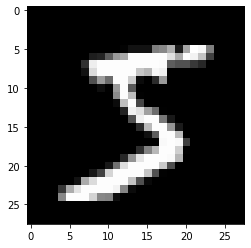

In [6]:
plt.imshow(image, 'gray')
plt.show()

In [7]:
image = image[tf.newaxis, ..., tf.newaxis]
image.shape

(1, 28, 28, 1)

## Conv2D
* tf.keras.layers.Conv2D
    * filters
    * kernel_size
    * strides
    * padding
    * activation

In [8]:
tf.keras.layers.Conv2D(filters=3, kernel_size=(3, 3), strides=(1, 1), padding='SAME', activation='relu')
# tf.keras.layers.Conv2D(3, 3, 1, 'SAME')

## Visualization
* tf.keras.layers.Conv2D

In [9]:
image = tf.cast(image, dtype=tf.float32)
image.dtype

tf.float32

In [10]:
# not activation

layer = tf.keras.layers.Conv2D(3, 3, 1, padding='SAME')
layer

In [11]:
output = layer(image)
output

<tf.Tensor: shape=(1, 28, 28, 3), dtype=float32, numpy=
array([[[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        ...,

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]]], dtype

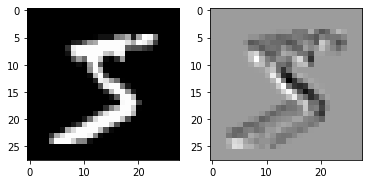

In [13]:
plt.subplot(1, 2, 1)
plt.imshow(image[0, :, :, 0], 'gray')
plt.subplot(1, 2, 2)
plt.imshow(output[0, :, :, 0], 'gray')
plt.show()

In [14]:
import numpy as np

In [15]:
np.min(image), np.max(image)

(0.0, 255.0)

In [16]:
np.min(output), np.max(output)

(-192.08533, 203.10965)

## Weight
* {layer}.get_weights() : return weights[0] and bias[1]

In [17]:
weight = layer.get_weights()

In [18]:
weight[0].shape, weight[1].shape

((3, 3, 1, 3), (3,))

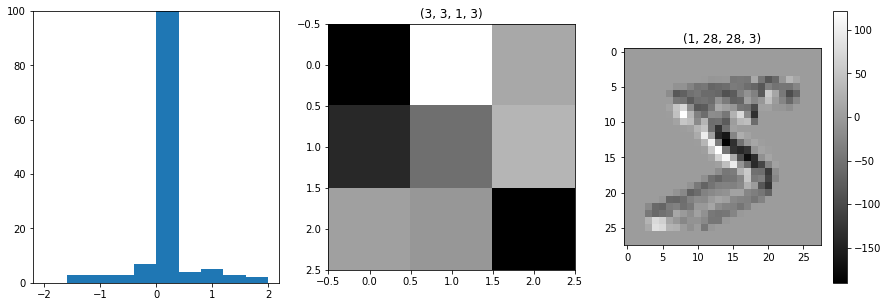

In [22]:
plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.hist(output.numpy().ravel(), range=[-2, 2])
plt.ylim(0, 100)
plt.subplot(132)
plt.title(weight[0].shape)
plt.imshow(weight[0][:, :, 0, 0], 'gray')
plt.subplot(133)
plt.title(output.shape)
plt.imshow(output[0, :, :, 0], 'gray')
plt.colorbar()
plt.show()

## ReLU Activation
* tf.keras.layers.ReLU()

In [24]:
activation = tf.keras.layers.ReLU()
activation_output = activation(output)
activation_output.shape

TensorShape([1, 28, 28, 3])

In [25]:
np.min(activation_output), np.max(activation_output)

(0.0, 203.10965)

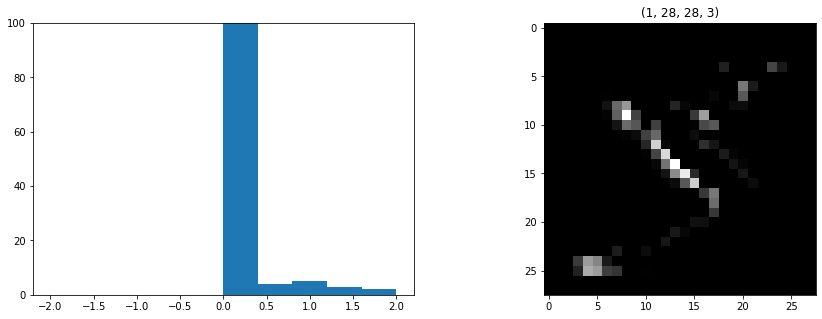

In [26]:
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.hist(activation_output.numpy().ravel(), range=[-2, 2])
plt.ylim(0, 100)
plt.subplot(122)
plt.title(activation_output.shape)
plt.imshow(activation_output[0, :, :, 0], 'gray')
plt.show()

## Pooling
* tf.keras.layers.MaxPool2D : max pooling

In [27]:
pool_layer = tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding='SAME')

In [29]:
pool_output = pool_layer(activation_output)
activation_output.shape, pool_output.shape

(TensorShape([1, 28, 28, 3]), TensorShape([1, 14, 14, 3]))

[]

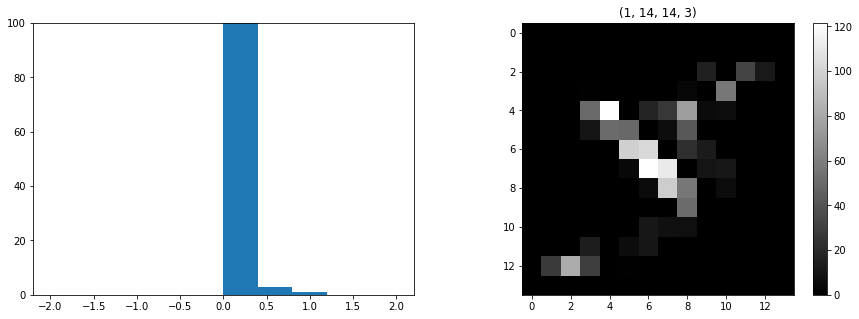

In [30]:
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.hist(pool_output.numpy().ravel(), range=[-2, 2])
plt.ylim(0, 100)
plt.subplot(122)
plt.title(pool_output.shape)
plt.imshow(pool_output[0, :, :, 0], 'gray')
plt.colorbar()
plt.plot()